In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import time

In [2]:
# Load the dataset
path = "../datasets"
set = "creditcard.csv"
data = pd.read_csv(f"{path}/{set}")

In [3]:
# Initial data exploration
data.info()  # Provides data type and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()  # Summary statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

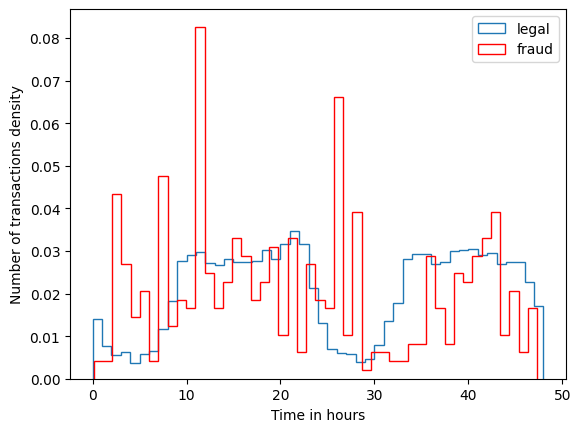

In [6]:
times_legal = data["Time"][data["Class"]==0]
times_fraud = data["Time"][data["Class"]==1]
# Convert time to hours
times_legal,times_fraud=times_legal/3600,times_fraud/3600
#The number of bins=48 represents 48 hour total measure time, each bin = 1 hour
plt.hist(times_legal, bins=48,density=True, histtype="step",label="legal")
plt.hist(times_fraud, bins=48,color="red",density=True,histtype="step",label = "fraud")
plt.legend()
plt.xlabel("Time in hours")
plt.ylabel("Number of transactions density")
plt.show()

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

In [7]:
# Remove duplicates from the dataset
data = data.drop_duplicates()

In [8]:
#Check the class imbalance
data["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

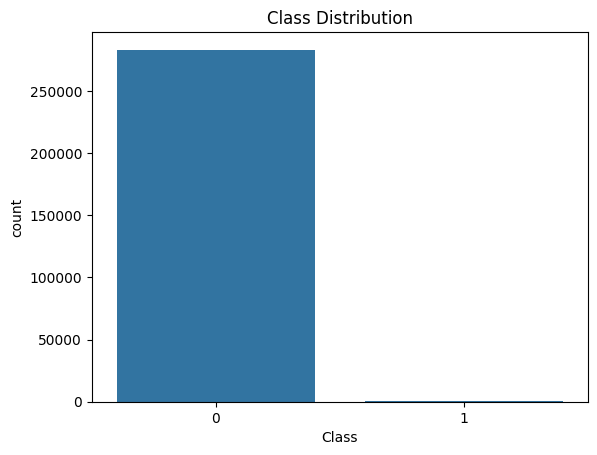

In [9]:
# Visualize the class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

In [10]:
# Extract hour information and perform group aggregation
data["Hour"]=data['Time'].apply(lambda x: np.floor(x / 3600))
tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


In [11]:
# Drop time feature, split features and target
data = data.drop(["Time", "Hour"], axis= 1)
X = data.drop('Class', axis=1)
y = data['Class']

In [12]:
# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11, stratify=y)

In [14]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=11)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [15]:
y_train_smote.value_counts()

Class
0    226602
1    226602
Name: count, dtype: int64

In [16]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=11)
start_time = time.time()
log_reg.fit(X_train_smote, y_train_smote)
log_reg_train_time = time.time() - start_time

In [17]:
# Predictions and evaluation for Logistic Regression
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [18]:
# Confusion matrix and classification report
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Confusion Matrix:
 [[55243  1408]
 [    9    86]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.91      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [19]:
# ROC-AUC curve for Logistic Regression
roc_auc_log = roc_auc_score(y_test, y_prob_log)
print("Logistic Regression ROC-AUC Score:", roc_auc_log)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)

Logistic Regression ROC-AUC Score: 0.9784859095719034


In [20]:
# Random Forest Model
rf_clf = RandomForestClassifier(random_state=11)
start_time = time.time()
rf_clf.fit(X_train_smote, y_train_smote)
rf_train_time = time.time() - start_time

In [21]:
# Predictions and evaluation for Random Forest
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

In [22]:
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Confusion Matrix:
 [[56643     8]
 [   18    77]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.81      0.86        95

    accuracy                           1.00     56746
   macro avg       0.95      0.91      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [23]:
# ROC-AUC curve for Random Forest
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)

Random Forest ROC-AUC Score: 0.9768445579536386


In [24]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

In [25]:
# XGBoost Model
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=11)
start_time = time.time()
xgb_clf.fit(X_train_smote, y_train_smote)
xgb_train_time = time.time() - start_time

In [26]:
# Predictions and evaluation for XGBoost
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

In [27]:
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Confusion Matrix:
 [[56627    24]
 [   15    80]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.77      0.84      0.80        95

    accuracy                           1.00     56746
   macro avg       0.88      0.92      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [28]:
# ROC-AUC curve for XGBoost
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

XGBoost ROC-AUC Score: 0.9864726687595053


In [29]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

In [30]:
# Decision Tree Model
dt_clf = DecisionTreeClassifier(random_state=11)
start_time = time.time()
dt_clf.fit(X_train_smote, y_train_smote)
dt_train_time = time.time() - start_time

In [31]:
# Predictions and evaluation for Decision Tree
y_pred_dt = dt_clf.predict(X_test)
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]

In [32]:
print("Decision Tree Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Matrix:
 [[56534   117]
 [   17    78]]
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.40      0.82      0.54        95

    accuracy                           1.00     56746
   macro avg       0.70      0.91      0.77     56746
weighted avg       1.00      1.00      1.00     56746



In [33]:
# ROC-AUC curve for Decision Tree
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

Decision Tree ROC-AUC Score: 0.9094936773541414


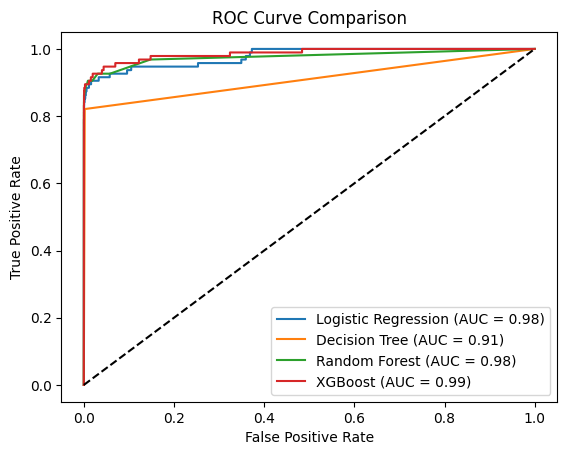

In [34]:
# Finalize ROC Curve
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [35]:
# Compare Training Times
print("Training Times (seconds):")
print(f"Logistic Regression: {log_reg_train_time:.2f}")
print(f"Random Forest: {rf_train_time:.2f}")
print(f"XGBoost: {xgb_train_time:.2f}")
print(f"Decision Tree: {dt_train_time:.2f}")


Training Times (seconds):
Logistic Regression: 0.91
Random Forest: 312.67
XGBoost: 1.71
Decision Tree: 36.50


This project focused on analyzing credit card transaction data to detect fraudulent activities. 
The dataset used was highly imbalanced, with the majority of transactions being non-fraudulent. 
To address this, SMOTE (Synthetic Minority Oversampling Technique) was applied to the training data, which helped balance the classes and enabled the models to perform effectively.

The results highlight that XGBoost achieved the highest AUC score (0.97) while maintaining a reasonable training time (1.60 seconds). This makes XGBoost an excellent choice for fraud detection tasks, as it balances performance and efficiency. Logistic Regression also performed well with an AUC of 0.96 and the fastest training time (0.96 seconds), making it a practical choice for scenarios with limited computational resources.

In the real world, credit card fraud detection often employs a combination of models and strategies to achieve high detection accuracy while minimizing false positives. 
The commonly used models include: Ensemble Learning Methods (models like Random Forest and XGBoost), Neural Networks (DNNs, CNNs), Anomaly Detection Techniques (Unsupervised methods, Isolation Forests).

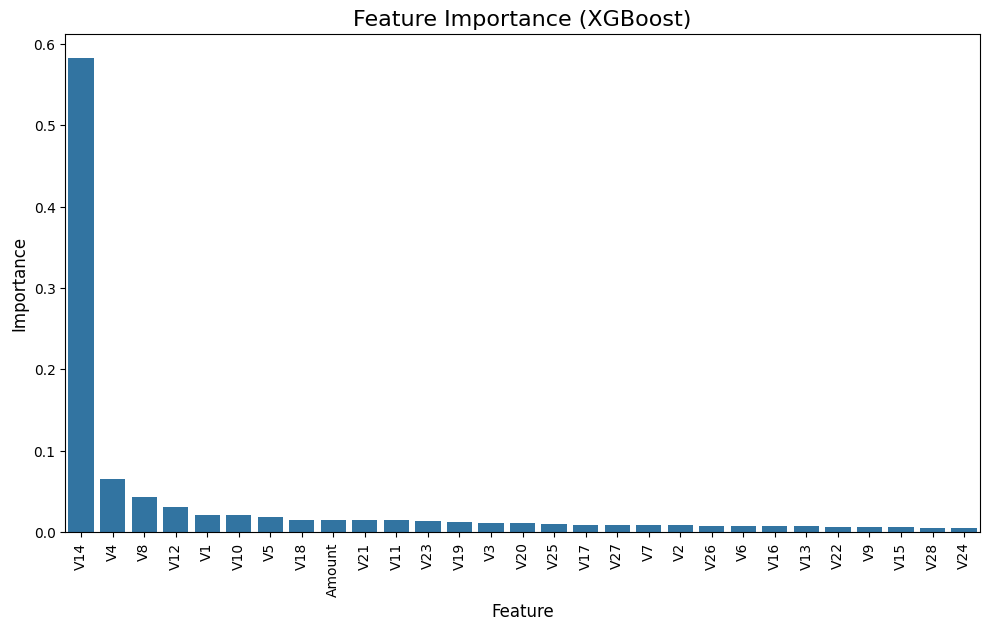

In [41]:
# Create a DataFrame for feature importance
feature_importances = pd.DataFrame({
    'Feature': data.columns[:-1],  # Exclude the target column
    'Importance': xgb_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Feature', y='Importance')
plt.title('Feature Importance (XGBoost)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()